In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Salisiah Adaik,2013
1,Hikikomori: Tokyo Plastic,2004
2,Sujata,1978
3,Boondoggle,1999
4,Blood Trail (II),2010


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [5]:
c = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
c = c.groupby(['year', 'character']).size().unstack().fillna(0)
c[c.Batman < c.Superman].size

22

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [6]:
c[c.Batman > c.Superman].size

54

In [7]:
c[c.Batman == c.Superman].size

18

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

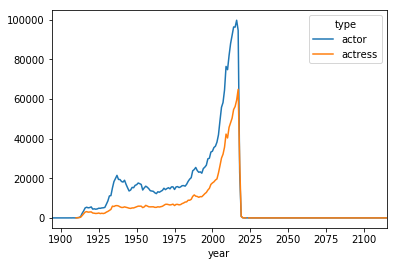

In [8]:
c = cast.groupby(['type', 'year']).size().unstack(0)
c.plot();

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

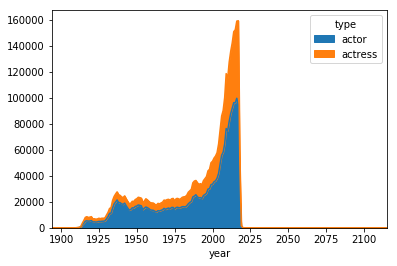

In [9]:
c.plot(kind='area');

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

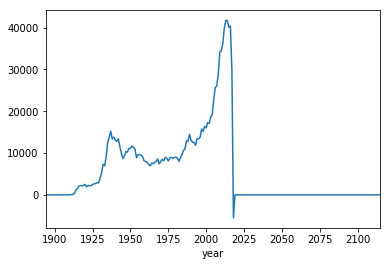

In [10]:
c = c.fillna(0)
(c.actor - c.actress).plot();

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

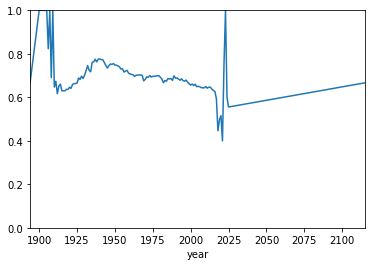

In [11]:
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1]);

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

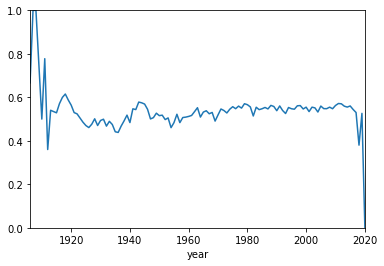

In [12]:
c = cast[cast.n == 2].groupby(['type', 'year']).size().unstack(0).fillna(0)
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1]);

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

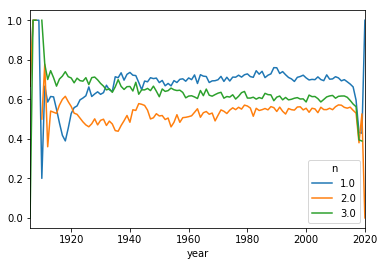

In [13]:
c = cast[cast.n <= 3].groupby(['year', 'n', 'type']).size().unstack().fillna(0)
c = c.actor / (c.actor + c.actress)
c.unstack().plot();